In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
import pandas as pd
import tensorflow as tf
from keras.layers.core import Flatten
from tensorflow.keras.optimizers import SGD

In [2]:
def load_data(data_path):
    data = pd.read_csv(data_path) #Read dataset from file csv
    data = data.values #Load values
    np.random.shuffle(data) #Shuffle dataset
    x = data[:, 1:].reshape(-1, 28, 28, 1)/255.0
    y = data[:, 0].astype(np.int32)
    y = tf.keras.utils.to_categorical(y, 10)
    return x, y
X_train, y_train = load_data("../input/fashionmnist/fashion-mnist_train.csv")
X_test, y_test = load_data("../input/fashionmnist/fashion-mnist_test.csv")
X = X_test

<function matplotlib.pyplot.show(close=None, block=None)>

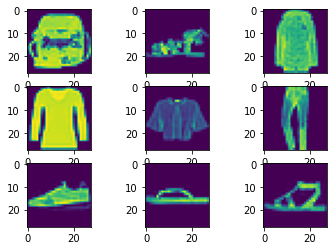

In [3]:
for i in range(9):
  plt.subplot(330 + i + 1)
  plt.imshow(X_train[i])
plt.show

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same', input_shape = (28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding= 'same', input_shape = (28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation = 'softmax'))

2022-05-16 03:42:04.751270: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 03:42:04.891082: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 03:42:04.891923: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 03:42:04.894468: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [6]:
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [7]:
history = model.fit(X_train, y_train, epochs = 50, batch_size=64, validation_data=(X_test, y_test), verbose= 1)

2022-05-16 03:42:08.016639: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-05-16 03:42:09.447038: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


938/938 [==============================] - 13s 6ms/step - loss: 0.5378 - accuracy: 0.8065 - val_loss: 0.3152 - val_accuracy: 0.8832
Epoch 2/50
938/938 [==============================] - 6s 6ms/step - loss: 0.3193 - accuracy: 0.8815 - val_loss: 0.2912 - val_accuracy: 0.8899
Epoch 3/50
938/938 [==============================] - 5s 6ms/step - loss: 0.2661 - accuracy: 0.9012 - val_loss: 0.2419 - val_accuracy: 0.9077
Epoch 4/50
938/938 [==============================] - 5s 6ms/step - loss: 0.2343 - accuracy: 0.9136 - val_loss: 0.2417 - val_accuracy: 0.9107
Epoch 5/50
938/938 [==============================] - 6s 6ms/step - loss: 0.2103 - accuracy: 0.9215 - val_loss: 0.2208 - val_accuracy: 0.9195
Epoch 6/50
938/938 [==============================] - 5s 6ms/step - loss: 0.1891 - accuracy: 0.9286 - val_loss: 0.2209 - val_accuracy: 0.9204
Epoch 7/50
938/938 [==============================] - 5s 5ms/step - loss: 0.1707 - accuracy: 0.9365 - val_loss: 0.2178 - val_accuracy: 0.9226
Epoch 8/50
938/9

In [8]:
score = model.evaluate(X_test, y_test, verbose = 1)

313/313 [==============================] - 1s 3ms/step - loss: 0.4654 - accuracy: 0.9227


In [9]:
model.save('fashion-mnist_cnn.h5')

In [10]:
y_pred = model.predict(X_test)

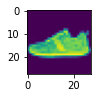

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


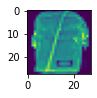

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


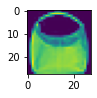

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


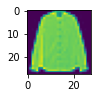

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


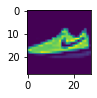

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


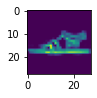

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


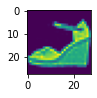

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


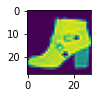

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


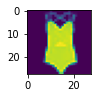

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
for i in range(9):
  plt.subplot(330 + i +1)
  plt.imshow(X[i])
  plt.show()  
  print(np.round(y_pred[i]))